In [37]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [38]:
import torch.nn.functional as F

In [39]:
n_data = torch.ones(100,2)

In [40]:
n_data = torch.ones(100, 2)      
x0 = torch.normal(2*n_data, 1)      
y0 = torch.zeros(100)               
x1 = torch.normal(-2*n_data, 1)     
y1 = torch.ones(100)                

In [74]:
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1)).type(torch.LongTensor)

In [75]:
x,y= Variable(x),Variable(y)

In [58]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.out=torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=F.softmax(self.out(x))
        return x

In [59]:
net = Net(n_feature=2, n_hidden=10, n_output=2) 

In [66]:
loss_func = torch.nn.CrossEntropyLoss()

In [68]:
# Use sequential method to create the models

/Users/edwin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


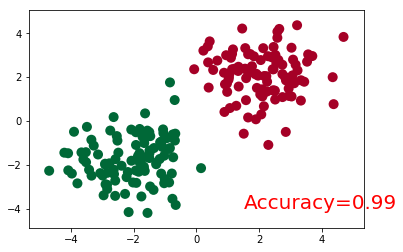

In [92]:
plt.ion() 
plt.show()
for t in range(200):
    out=net(x)
    loss = loss_func(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.0
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  
plt.show()

In [94]:
net2=torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2),
    torch.nn.Softmax()
)

In [97]:
optimizer = torch.optim.SGD(net2.parameters(),lr=0.3)

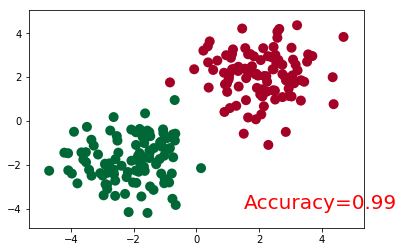

In [98]:
plt.ion() 
plt.show()
for t in range(200):
    out=net2(x)
    loss = loss_func(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.0
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  
plt.show()